# Assignment #5 - Deep Learning (Extra Credits)

### <font color="red"> DUE: Dec 6 (Friday) 11:00 pm </font>  

<font color="blue"> Gopal Sharma </font>

# I. Overview

Describe the objective of this assignment. You can briefly state how you accompilsh it.

# II. Data

The dataset for the classification is taken from the UCI Machine Learning repository. The dataset consists of census information of about 49k people earning in some capacity. The following are the attributes of the dataset:

1. Age, Continuous

2. Workclass, of the person

3. fnlwgt, final weight, continuous

4. education, of the person, as an object

5. education-num

6. marital-status, of the person

7. occupation, of the person

8. relationship, of the person

9. race, of the person

10. sex

11. capital-gain

12. capital-loss

13. hours-per-week

14. native country

15. Salary, of the person

# Data Visualization

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Latex
from IPython.display import Math
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
df= pd.read_csv('adult.data',names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary'])
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [74]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [75]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


# Preprocessing Data

In [76]:
df['Salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: Salary, dtype: int64

In [77]:
df.shape

(32561, 15)

In [78]:
#There are so many object data types which we need to convert into int data types for the preprocessing to take place.

salary_map={' <=50K':1,' >50K':-1}
df['Salary']=df['Salary'].map(salary_map).astype(int)

df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,-1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,-1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,-1


In [79]:
#Convert sex into integer

df['sex'] = df['sex'].map({' Male':1,' Female':0}).astype(int)

In [80]:
#df.drop('education','fnlwgt', axis=1, inplace=True)
df.drop(columns=['fnlwgt', 'education'], inplace=True)

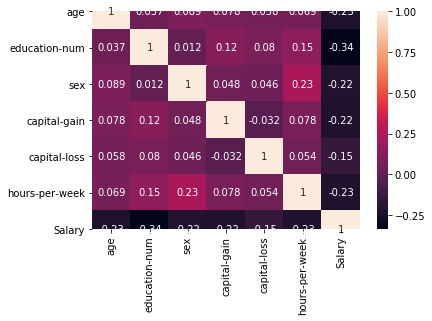

In [81]:
sns.heatmap(df.corr(), annot = True)

In [82]:
df.shape
df['native-country'] = df['native-country'].replace(' ?',np.nan)
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)

df.dropna(how='any',inplace=True)
df.shape

(30162, 13)

In [83]:
for ds in [df]:
    ds.loc[ds['native-country'] != ' United-States', 'native-country'] = 'Non-US'
    ds.loc[ds['native-country'] == ' United-States', 'native-country'] = 'US'

In [84]:
#Converting country into integer

df['native-country'] = df['native-country'].map({'US':1,'Non-US':0}).astype(int)

In [85]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,0,1


In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['race'])
df['race']=le.transform(df['race'])
le.fit(df['workclass'])
df['workclass']=le.transform(df['workclass'])
le.fit(df['marital-status'])
df['marital-status']=le.transform(df['marital-status'])
le.fit(df['occupation'])
df['occupation']=le.transform(df['occupation'])
le.fit(df['relationship'])
df['relationship']=le.transform(df['relationship'])

In [87]:
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,5,13,4,0,1,4,1,2174,0,40,1,1
1,50,4,13,2,3,0,4,1,0,0,13,1,1
2,38,2,9,0,5,1,4,1,0,0,40,1,1
3,53,2,7,2,5,0,2,1,0,0,40,1,1
4,28,2,13,2,9,5,2,0,0,0,40,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,12,2,12,5,4,0,0,0,38,1,1
32557,40,2,9,2,6,0,4,1,0,0,40,1,-1
32558,58,2,9,6,0,4,4,0,0,0,40,1,1
32559,22,2,9,4,0,3,4,1,0,0,20,1,1


In [88]:
X = df[df.columns[0:-1]]
y = df.iloc[:,-1:]
print('X shape, Y Shape:')
print(X.shape, y.shape)

X shape, Y Shape:
(30162, 12) (30162, 1)


# III. Methods

In this assignment, you are building a deep network with more than 5 layers using TensorFlow. 
Looking at the chart below, get some idea about how you can construct your networks for what problem and why you pick your structure. 

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow (or Keras) codes. 
- Explain how you apply your model to your data. 

Following images are only for you to get some idea. You do not necessarily stick with these. You can come up with your own structure or shape. 

<img src="https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67" width=700 />



In [89]:
import tensorflow as tf
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
from tensorflow import keras
from tensorflow.keras import models, layers, losses, optimizers, metrics
#from keras import models, layers, losses, optimizers, metrics
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, Adam, RMSprop
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *

Device mapping:



In [90]:
#To normalize the data
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)
#split the data
X_trn, X_tst, y_trn, y_tst = train_test_split(scaled_x, y, test_size=0.2, random_state=1)

In [91]:
X_trn.shape

(24129, 12)

In [92]:
X_tst.shape

(6033, 12)

In [93]:
y_tst.shape

(6033, 1)

### Explanation of function's code
- Function for adding the layers with given list of number of neurons
- model = model you want to train
- input_dim = number of features to be considered
- layer_unit = list of number of neurons per network.
    - ex: layer_unit=[10,6,1]. This means there are 10 neurons in layer2, 6 neurons in layer3 1 neuron layer4.
- activation_fun= list of the activation function to be used in that layer
    - ex: activation_fun=['relu','tanh']. This means activation function will 'relu' in 1st layer and 'tanh' in the 2nd layer.
- activation1= activation function for the 1st layer


- The first layer of the model is given the neurons with the same numbers of the features(input_dim). 
- In the for loop, the layer is one by one added with given number of units in the array.
- Different activation function for the different layer can also be defined 

In [94]:
def add_layers(model,input_dim,layer_unit,activation_fun,activation1):
    model.add(layers.Dense(input_dim=input_dim, units=input_dim, activation=activation1))
    for i in range(len(layer_unit)):
        model.add(layers.Dense(units=layer_unit[i], activation=activation_fun[i]))
    return model

### Model 1
- This model has same number of nodes in all hidden layer, to check how it will behave in such case
- By checking differnt number of neurons for the same structure, the observation on at what number of neuron, NN converges can be found.
- The structure selected is 10 neurons in each 5 hidden layer.

### Explaination of the code
- model is defined as the Sequential.
- "add_layers" function will add the number of layers with the number of neurons and activation function for that layer.
- summary function will give the summary of the network that is built.
- optimizer is defined with the learning rate.
- compile function will generate important performance parameters like loss & Matrics
- fit function will run the model on the test data.

In [95]:
X_trn = np.asarray(X_trn)
X_tst = np.asarray(X_tst)
y_trn = np.asarray(y_trn)
y_tst = np.asarray(y_tst)


In [96]:
import timeit
from tensorflow import keras
start = timeit.default_timer()
m1=keras.models.Sequential()
m1=add_layers(m1,12,[10,10,10,10,10,1],['relu','relu','relu','relu','relu','relu','relu'],'relu')
m1.summary()
optimizer1 = optimizers.Adam(lr=0.001)
m1.compile(optimizer1, loss='binary_crossentropy', metrics=['accuracy'])
history_m1 = m1.fit(X_trn, y_trn, epochs=10, validation_data=[X_tst, y_tst])
stop = timeit.default_timer()
print('Time: ', stop - start)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 12)                156       
_________________________________________________________________
dense_117 (Dense)            (None, 10)                130       
_________________________________________________________________
dense_118 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_119 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_120 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_121 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_122 (Dense)            (None, 1)               

### Model 2

- Here the structure with descending number of neurons are selected with same activation function relu.
- This function will help to get the idea about how optimizer will affect the model performance. Plus if we decrease the number of neurons in each layer, we will be able to know how model is performing.
- Hidden layer 1 to 6 is having neurons 20,10,9,7,7 and 2.

### Explaination of the code
- model is defined as the Sequential.
- "add_layers" function will add the number of layers with the number of neurons and activation function for that layer.
- summary function will give the summary of the network that is built.
- optimizer is defined with the learning rate.
- compile function will generate important performance parameters like loss & Matrics
- fit function will run the model on the test data.

In [97]:
m2=keras.models.Sequential()
m2=add_layers(m2,12,[20,10,9,7,7,2,1],['relu','relu','relu','relu','relu','relu','relu'],'sigmoid')
#m2.summary()
optimizer2 = optimizers.RMSprop(lr=0.001)
m2.compile(optimizer2, loss='binary_crossentropy', metrics=['accuracy'])
history_m2 = m2.fit(X_trn, y_trn, epochs=10, validation_data=[X_tst, y_tst])

Train on 24129 samples, validate on 6033 samples
Epoch 1/10
24129/24129 [==============================] - 5s 187us/sample - loss: -0.0977 - acc: 0.4511 - val_loss: -0.7281 - val_acc: 0.4227
Epoch 2/10
24129/24129 [==============================] - 3s 136us/sample - loss: -0.6311 - acc: 0.5556 - val_loss: -0.7202 - val_acc: 0.5967
Epoch 3/10
24129/24129 [==============================] - 3s 125us/sample - loss: -0.7124 - acc: 0.5673 - val_loss: -0.8851 - val_acc: 0.5150
Epoch 4/10
24129/24129 [==============================] - 3s 131us/sample - loss: -0.7605 - acc: 0.5762 - val_loss: -1.0122 - val_acc: 0.5783
Epoch 5/10
24129/24129 [==============================] - 4s 172us/sample - loss: -0.8247 - acc: 0.5776 - val_loss: -0.6891 - val_acc: 0.4666
Epoch 6/10
24129/24129 [==============================] - 3s 135us/sample - loss: -0.8154 - acc: 0.5544 - val_loss: -1.0075 - val_acc: 0.5758
Epoch 7/10
24129/24129 [==============================] - 4s 152us/sample - loss: -0.8597 - acc: 0.

### Model 3
- Here the structure with first descending number of neuron and then increasing number of neuron is taken.
- While decreasing the number of neurons, we will get the best features and then increasing the neurons over the same would be giving a good combination of the those best selected features.
- Hidden layer 1 to 6 is having neurons 20,15,10,10,15 and 20. 

### Explaination of the code
- model is defined as the Sequential.
- "add_layers" function will add the number of layers with the number of neurons and activation function for that layer.
- summary function will give the summary of the network that is built.
- optimizer is defined with the learning rate.
- compile function will generate important performance parameters like loss & Matrics
- fit function will run the model on the test data.

In [98]:
m3=keras.models.Sequential()
m3=add_layers(m3,12,[20,15,10,10,15,20,1],['relu','relu','relu','relu','relu','relu','relu','relu','relu','relu','relu'],'tanh')
#m3.summary()
optimizer3 = optimizers.RMSprop(lr= 0.001)
m3.compile(optimizer3, loss='binary_crossentropy', metrics=['accuracy'])
history_m3 = m3.fit(X_trn, y_trn, epochs=10, validation_data=[X_tst, y_tst])

Train on 24129 samples, validate on 6033 samples
Epoch 1/10
24129/24129 [==============================] - 4s 185us/sample - loss: -0.1755 - acc: 0.4805 - val_loss: -0.8099 - val_acc: 0.5148
Epoch 2/10
24129/24129 [==============================] - 3s 142us/sample - loss: -0.5718 - acc: 0.5328 - val_loss: -0.6841 - val_acc: 0.4996
Epoch 3/10
24129/24129 [==============================] - 3s 137us/sample - loss: -0.7462 - acc: 0.5442 - val_loss: -0.9888 - val_acc: 0.5317
Epoch 4/10
24129/24129 [==============================] - 4s 154us/sample - loss: -0.8046 - acc: 0.5547 - val_loss: -0.9629 - val_acc: 0.5657
Epoch 5/10
24129/24129 [==============================] - 4s 148us/sample - loss: -0.7563 - acc: 0.5520 - val_loss: -1.0150 - val_acc: 0.4767
Epoch 6/10
24129/24129 [==============================] - 4s 154us/sample - loss: -0.8819 - acc: 0.5609 - val_loss: -1.0995 - val_acc: 0.5367
Epoch 7/10
24129/24129 [==============================] - 4s 157us/sample - loss: -0.9139 - acc: 0.

# Plots 

## Results of Model 1

Text(0, 0.5, 'Loss')

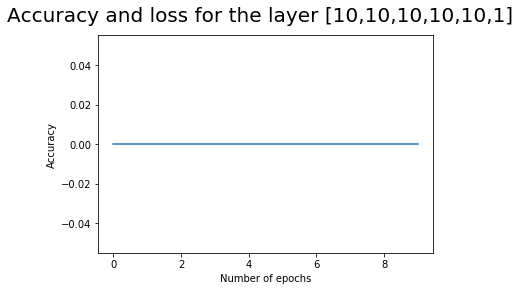

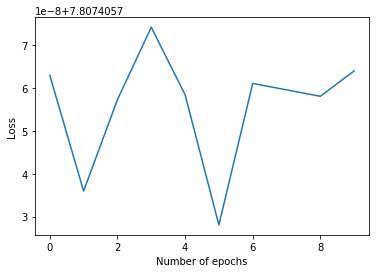

In [99]:
f,ax=plt.subplots()
f.suptitle('Accuracy and loss for the layer [10,10,10,10,10,1]', fontsize = 20)
ax.plot(history_m1.history['acc'])
ax.set_xlabel("Number of epochs")
ax.set_ylabel("Accuracy")
f,ax2=plt.subplots()
ax2.plot(history_m1.history['loss'])
ax2.set_xlabel("Number of epochs")
ax2.set_ylabel("Loss")

### Explanation of experimental codes
This experiment basically checks that how the number of neurons are affecting the performance of neural network. For that each layer is given the same number of neurons in 4 layers. This experiment is performed for 64,32,16,8,4,2 and 1 neurons.

In [100]:
start = timeit.default_timer()
n_hiddens=[ 64, 32, 16, 8, 4, 2, 1]
scores = []
for n_hidden in n_hiddens:
    # Build a simple neural network.
    l=[n_hidden]*3+[1]  #3 hidden layer +1 output layer
    a=['relu']*4        #total 4 layers with relu activation function
    m=keras.models.Sequential()
    m=add_layers(m,12,l,a,'relu')
    #m1.summary()
    optimizer1 = optimizers.Adam(lr=0.01)
    m.compile(optimizer1, loss='binary_crossentropy', metrics=['accuracy'])
    history_m1 = m.fit(X_trn, y_trn, epochs=10, validation_data=[X_tst, y_tst])
    
    Y_cv_pred = m.predict_classes(X_test, batch_size = 10, verbose = 1)
    score = accuracy_score(y_tst, Y_cv_pred)
    scores.append(score)
    print('Using [%d] number of hidden neurons yields. Accuracy score: %.4f' % (n_hidden, score))
    print('')

stop = timeit.default_timer()
print('Time: ', stop - start)

Train on 24129 samples, validate on 6033 samples
Epoch 1/10
24129/24129 [==============================] - 4s 178us/sample - loss: 1.0397 - acc: 0.5003 - val_loss: -0.4929 - val_acc: 0.5201
Epoch 2/10
24129/24129 [==============================] - 3s 122us/sample - loss: 0.5479 - acc: 0.5263 - val_loss: 2.1302 - val_acc: 0.5632
Epoch 3/10
24129/24129 [==============================] - 3s 129us/sample - loss: 3.1924 - acc: 0.6469 - val_loss: 2.6765 - val_acc: 0.5956
Epoch 4/10
24129/24129 [==============================] - 3s 142us/sample - loss: 2.9652 - acc: 0.6263 - val_loss: 5.0510 - val_acc: 0.7298
Epoch 5/10
24129/24129 [==============================] - 3s 124us/sample - loss: 3.9211 - acc: 0.7152 - val_loss: 3.1386 - val_acc: 0.6692
Epoch 6/10
24129/24129 [==============================] - 3s 133us/sample - loss: 3.6275 - acc: 0.6994 - val_loss: 5.3502 - val_acc: 0.7303
Epoch 7/10
24129/24129 [==============================] - 3s 124us/sample - loss: 3.8262 - acc: 0.6961 - val_l

Text(0, 0.5, 'Accuracy score')

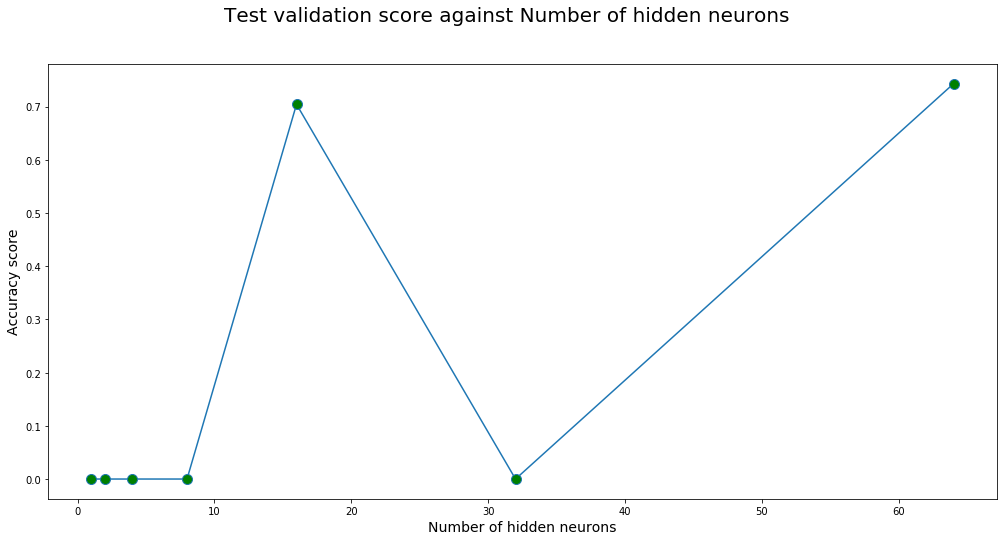

In [101]:
fig = plt.figure()
fig.suptitle('Test validation score against Number of hidden neurons', fontsize = 20)
fig.set_figwidth(17)
fig.set_figheight(8)
ax = fig.add_subplot(111)
ax.plot(n_hiddens, scores, '-o', markersize = 10, markerfacecolor = 'g')
ax.set_xlabel('Number of hidden neurons', fontsize = 14)
ax.set_ylabel('Accuracy score', fontsize = 14)

### Result of the Model 2

Text(0, 0.5, 'Loss')

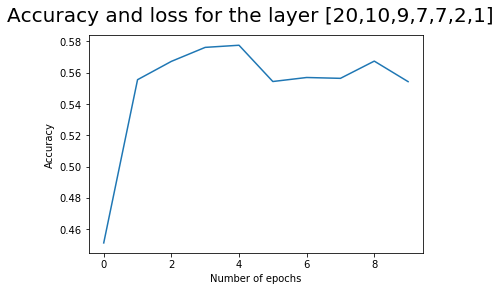

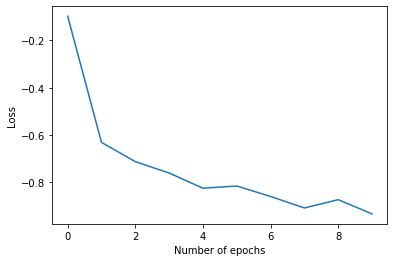

In [102]:
f,ax=plt.subplots()
f.suptitle('Accuracy and loss for the layer [20,10,9,7,7,2,1]', fontsize = 20)
ax.plot(history_m2.history['acc'])
ax.set_xlabel("Number of epochs")
ax.set_ylabel("Accuracy")
f,ax2=plt.subplots()
ax2.plot(history_m2.history['loss'])
ax2.set_xlabel("Number of epochs")
ax2.set_ylabel("Loss")

### Result of the Model 3

Text(0, 0.5, 'Loss')

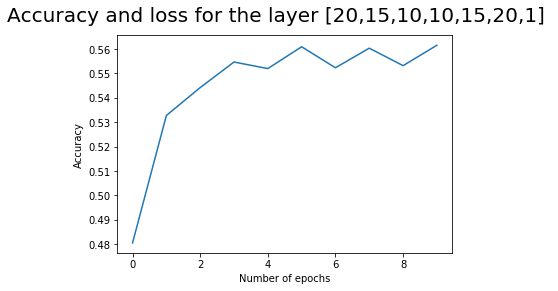

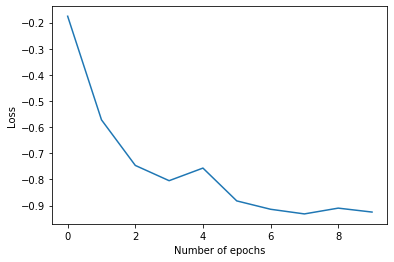

In [103]:
f,ax=plt.subplots()
f.suptitle('Accuracy and loss for the layer [20,15,10,10,15,20,1] ', fontsize = 20)
ax.plot(history_m3.history['acc'])
ax.set_xlabel("Number of epochs")
ax.set_ylabel("Accuracy")
f,ax2=plt.subplots()
ax2.plot(history_m3.history['loss'])
ax2.set_xlabel("Number of epochs")
ax2.set_ylabel("Loss")

### Summary about the choice of network structures
#### Model 1 Observations:
Here each layer of the neural network is given same number of neurons.
From loss Plot, it can be concluded that loss decreases linearly by increasing number of epochs. 
From accuracy Plot, there are many ups and downs in the accuracy while increasing the  number of epochs. 

#### Model 2 Observations:
With each increasing layer, the number of neurons given to each layer is decreased.
From loss plot,I conclude that loss converges after one point and by increasing the number of epochs doesn't make sense.
From accuracy plot,I concluded that accuracy after one point doesn't increase with increase in the number of epochs.

#### Model 3 Observations:
As the layers Increase,the number of neurons given to each layer are first decreased and then increased.
From loss Plot, I can concluded that it is decreased first and increased.
From accuracy Plot,I conclude that it takes more epochs to converged.

In [104]:
print("Accuracy of model 1")
print(history_m1.history['acc'][-1])
print("\n")
print("Accuracy of model 2")
print(history_m2.history['acc'][-1])
print("\n")
print("Accuracy of model 3")
print(history_m3.history['acc'][-1])
print("\n")

Accuracy of model 1
0.0


Accuracy of model 2
0.5543122


Accuracy of model 3
0.5615649




# IV - Results

- Presents the results of applications of your deep networks.
- Visualize the results 
- Discuss about the choice of network structures and performance of it as you change the structures.  
- What do you think about the results? 

# Conclusions

I got to understand the new API Tensorflow. It was difficult to handle categorical variables in tensorflow because this needs to be embedded. Plus, tensorflow is also not giving the accuracy at the end of each epochs. Keras is really easy to implement and gives accuracy for each epochs.

## Grading

Only well-written notebook will be graded. Please follow the structure and fill in as the other assignments. 

extra credit points | description
--|:--
1 | First structure (implementation, explanation, plot results, discussion of results)
1 | Second structure (implementation, explanation, plot results, discussion of results)
1 | Third structure (implementation, explanation, plot results, discussion of results)
1 | Explaining and discussing the reason for the selection (Any relation to your data?)
  | Comparing the results, discuss or verify your choice 

#### Optional Extra Credits

- [OPT 1] Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources or MAMBA cluster for this test. 
- [OPT 2] Implement one of neural networks in the chart above and apply it to some real data. 